### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [ ]:
# Importing the datasets
df = pd.read_csv('/content/drive/MyDrive/Flight_On_Time_Data.csv')


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df.head()

In [ ]:
df.shape

(6777978, 43)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777978 entries, 0 to 6777977
Data columns (total 43 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Carrier_Name                    object 
 1   Year                            int64  
 2   Quarter                         int64  
 3   Month                           object 
 4   Month_Day                       int64  
 5   Week_Day                        object 
 6   Flight_Date                     object 
 7   Airline_DOT_ID                  int64  
 8   Tail_Number                     object 
 9   Flight_Number                   int64  
 10  Origin_Airport_ID               int64  
 11  Origin_City_Market_ID           int64  
 12  Origin_IATA_Code                object 
 13  Origin_City_State               object 
 14  Destination_Airport_ID          int64  
 15  Destination_City_Market_ID      int64  
 16  Destination_IATA_Code           object 
 17  Destination_City_State     

In [ ]:
df.describe(include="all")

,Carrier_Name,Year,Quarter,Month,Month_Day,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,Origin_Airport_ID,Origin_City_Market_ID,Origin_IATA_Code,Origin_City_State,Destination_Airport_ID,Destination_City_Market_ID,Destination_IATA_Code,Destination_City_State,Dep_Time_Block_Group,Scheduled_Departure_Time,Actual_Dep_Time,Dep_Time_Offset,Dep_Delay_Minutes,Dep_Delay_At_Least_15_Minutes,Scheduled_Arrival_Time,Arr_Time_Block_Group,Actual_Arr_Time,Arr_Time_Offset,Arr_Delay_Minutes,Arr_Delay_At_Least_15_Minutes,Flight_Cancelled,Flight_Diverted,Scheduled_Gate_to_Gate_Time,Actual_Gate_to_Gate_Time,Time_Airborne,Number_of_Flights,Distance_Miles,Distance_Group,Carrier_Delay,Weather_Delay,National_Aviation_System_Delay,Security_Delay,Late_Aircraft_Delay
count,6777978,6.777978e+06,6.777978e+06,6777978,6.777978e+06,6777978,6777978,6.777978e+06,6777978,6.777978e+06,6.777978e+06,6.777978e+06,6777978,6777978,6.777978e+06,6.777978e+06,6777978,6777978,6777978,6.777978e+06,6.777978e+06,6.777978e+06,6.777978e+06,6.777978e+06,6.777978e+06,6777978,6.777978e+06,6.777978e+06,6.777978e+06,6.777978e+06,6777978.0,6777978.0,6.777978e+06,6.777978e+06,6.777978e+06,6777978.0,6.777978e+06,6.777978e+06,1.371450e+06,1.371450e+06,1.371450e+06,1.371450e+06,1.371450e+06
unique,15,NaN,NaN,12,NaN,7,366,NaN,5969,NaN,NaN,NaN,348,342,NaN,NaN,348,342,6,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Southwest Airlines Co.,NaN,NaN,Oct,NaN,Friday,2023-11-26,NaN,N488HA,NaN,NaN,NaN,ATL,"Chicago, IL",NaN,NaN,ATL,"Chicago, IL",Morning,NaN,NaN,NaN,NaN,NaN,NaN,Morning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1436531,NaN,NaN,596003,NaN,1006397,20511,NaN,3387,NaN,NaN,NaN,333791,337357,NaN,NaN,333809,336927,1675136,NaN,NaN,NaN,NaN,NaN,NaN,1541215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.023240e+03,2.525636e+00,NaN,1.578010e+01,NaN,NaN,1.993903e+04,NaN,2.326942e+03,1.265096e+04,3.173691e+04,NaN,NaN,1.265146e+04,3.173762e+04,NaN,NaN,NaN,1.329214e+03,1.332679e+03,1.213807e+01,1.529571e+01,2.025111e-01,1.487477e+03,NaN,1.458442e+03,6.331910e+00,1.518102e+01,2.023393e-01,0.0,0.0,1.463600e+02,1.405534e+02,1.150121e+02,1.0,8.350128e+02,3.812710e+00,2.500295e+01,3.889372e+00,1.266256e+01,1.541595e-01,2.828230e+01
std,NaN,4.270236e-01,1.112769e+00,NaN,8.798410e+00,NaN,NaN,3.727813e+02,NaN,1.572670e+03,1.531122e+03,1.315375e+03,NaN,NaN,1.531433e+03,1.315764e+03,NaN,NaN,NaN,4.956277e+02,5.115607e+02,5.550007e+01,5.449913e+01,4.018711e-01,5.241219e+02,NaN,5.489676e+02,5.759446e+01,5.431121e+01,4.017438e-01,0.0,0.0,7.295989e+01,7.264227e+01,7.051693e+01,0.0,5.979042e+02,2.345291e+00,7.772250e+01,3.263982e+01,3.161361e+01,3.478900e+00,6.377245e+01
min,NaN,2.023000e+03,1.000000e+00,NaN,1.000000e+00,NaN,NaN,1.939300e+04,NaN,1.000000e+00,1.013500e+04,3.007000e+04,NaN,NaN,1.013500e+04,3.007000e+04,NaN,NaN,NaN,1.000000e+00,1.000000e+00,-9.900000e+01,0.000000e+00,0.000000e+00,1.000000e+00,NaN,1.000000e+00,-1.190000e+02,0.000000e+00,0.000000e+00,0.0,0.0,1.000000e+00,1.500000e+01,6.000000e+00,1.0,2.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,2.023000e+03,2.000000e+00,NaN,8.000000e+00,NaN,NaN,1.979000e+04,NaN,1.064000e+03,1.129200e+04,3.064700e+04,NaN,NaN,1.129200e+04,3.064700e+04,NaN,NaN,NaN,9.060000e+02,9.080000e+02,-6.000000e+00,0.000000e+00,0.000000e+00,1.100000e+03,NaN,1.041000e+03,-1.500000e+01,0.000000e+00,0.000000e+00,0.0,0.0,9.300000e+01,8.700000e+01,6.300000e+01,1.0,3.990000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,2.023000e+03,3.000000e+00,NaN,1.600000e+01,NaN,NaN,1.980500e+04,NaN,2.077000e+03,1.288900e+04,3.145300e+04,NaN,NaN,1.288900e+04,3.145300e+04,NaN,NaN,NaN,1.320000e+03,1.325000e+03,-2.000000e+00,0.000000e+00,0.000000e+00,1.515000e+03,NaN,1.500000e+03,-6.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,1.300000e+02,1.240000e+02,9.800000e+01,1.0,6.800000e+02

In [ ]:
# Check for missing values present and provide observations
df.isna().sum()

Carrier_Name                            0
Year                                    0
Quarter                                 0
Month                                   0
Month_Day                               0
Week_Day                                0
Flight_Date                             0
Airline_DOT_ID                          0
Tail_Number                             0
Flight_Number                           0
Origin_Airport_ID                       0
Origin_City_Market_ID                   0
Origin_IATA_Code                        0
Origin_City_State                       0
Destination_Airport_ID                  0
Destination_City_Market_ID              0
Destination_IATA_Code                   0
Destination_City_State                  0
Dep_Time_Block_Group                    0
Scheduled_Departure_Time                0
Actual_Dep_Time                         0
Dep_Time_Offset                         0
Dep_Delay_Minutes                       0
Dep_Delay_At_Least_15_Minutes     

In [ ]:
#checking for the duplicated
df.duplicated()

In [ ]:
### Creating a seperate dataset for the rows where last 5 varaibles are nulls
### to check if those nulls are 0s in the "corresponding variables"
### the variable we're interested in Arr_Delay_At_Least_15_Minutes
#  Arr_Time_Offset                 int64
#  Arr_Delay_Minutes               int64
#  Arr_Delay_At_Least_15_Minutes   int64

nulldf = df[df.Carrier_Delay.isna()]

In [ ]:
#checking values for delays for the rows that have last 5 variables nulls
# If other variables are clsoe to 0 for the same rows, then I'll know I can replace
# those values with 0
df.Arr_Delay_Minutes[df.Carrier_Delay.isna()].mean()

In [ ]:
df.Arr_Delay_Minutes[df.Carrier_Delay.isna()].min()

In [ ]:
df.Arr_Delay_Minutes[df.Carrier_Delay.isna()].max()

In [ ]:
sns.displot(data=df[df.Carrier_Delay.isna()], x='Arr_Delay_Minutes', kde=True)

In [ ]:
df.Arr_Delay_Minutes[df.Carrier_Delay.isna()].plot(kind='box')

In [ ]:
import seaborn as sns #importing seaborn library

sns.boxplot(x="Arr_Delay_At_Least_15_Minutes", y="Arr_Delay_Minutes", data=nulldf)

In [ ]:
# Checking histigram for Arr_Delay_Minutes for the rows with missing values
nulldf.hist(by='Arr_Delay_At_Least_15_Minutes',column = 'Arr_Delay_Minutes')

In [ ]:
## Assuming that all the null values are 0 (no delay)
df.Carrier_Delay[df.Carrier_Delay.isnull()] = 0
df.Weather_Delay[df.Weather_Delay.isnull()] = 0
df.National_Aviation_System_Delay[df.National_Aviation_System_Delay.isnull()] = 0
df.Security_Delay[df.Security_Delay.isnull()] = 0
df.Late_Aircraft_Delay[df.Late_Aircraft_Delay.isnull()] = 0

In [ ]:
df.isna().sum()

Carrier_Name                      0
Year                              0
Quarter                           0
Month                             0
Month_Day                         0
Week_Day                          0
Flight_Date                       0
Airline_DOT_ID                    0
Tail_Number                       0
Flight_Number                     0
Origin_Airport_ID                 0
Origin_City_Market_ID             0
Origin_IATA_Code                  0
Origin_City_State                 0
Destination_Airport_ID            0
Destination_City_Market_ID        0
Destination_IATA_Code             0
Destination_City_State            0
Dep_Time_Block_Group              0
Scheduled_Departure_Time          0
Actual_Dep_Time                   0
Dep_Time_Offset                   0
Dep_Delay_Minutes                 0
Dep_Delay_At_Least_15_Minutes     0
Scheduled_Arrival_Time            0
Arr_Time_Block_Group              0
Actual_Arr_Time                   0
Arr_Time_Offset             

In [ ]:
# Percentage of null values for the last 5 variables, almost 80% !!!!!
5406528 / 6777978

0.7976608953289609

In [ ]:
### Dividing data into continous and categorical datasets
### We will use this later for feature selections

df2 = df.dtypes
df3 = pd.DataFrame(df2)
print(df3)
df4 = df3.filter(df3.iloc[:,0] == 'object')

# df4 - categorical variables
print(df4.info())

                                      0
Carrier_Name                     object
Year                              int64
Quarter                           int64
Month                            object
Month_Day                         int64
Week_Day                         object
Flight_Date                      object
Airline_DOT_ID                    int64
Tail_Number                      object
Flight_Number                     int64
Origin_Airport_ID                 int64
Origin_City_Market_ID             int64
Origin_IATA_Code                 object
Origin_City_State                object
Destination_Airport_ID            int64
Destination_City_Market_ID        int64
Destination_IATA_Code            object
Destination_City_State           object
Dep_Time_Block_Group             object
Scheduled_Departure_Time          int64
Actual_Dep_Time                   int64
Dep_Time_Offset                   int64
Dep_Delay_Minutes                 int64
Dep_Delay_At_Least_15_Minutes     int64


In [ ]:
df4

""
Carrier_Name
Year
Quarter
Month
Month_Day
Week_Day
Flight_Date
Airline_DOT_ID
Tail_Number
Flight_Number


In [ ]:
# Summary statistics of 'Arr_Delay_At_Least_15_Minutes' variable
df['Arr_Delay_At_Least_15_Minutes'].value_counts()

Arr_Delay_At_Least_15_Minutes
0    5406527
1    1371451
Name: count, dtype: int64

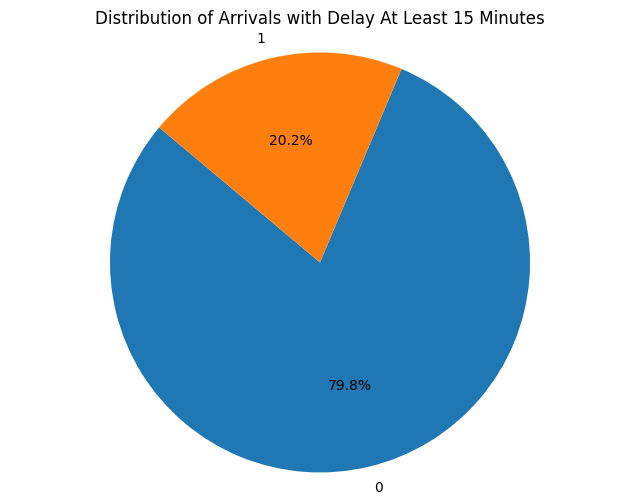

In [ ]:

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(df['Arr_Delay_At_Least_15_Minutes'].value_counts(), labels=df['Arr_Delay_At_Least_15_Minutes'].value_counts().keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Arrivals with Delay At Least 15 Minutes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Looks like we have very unbalanced data set, almost 80% no delays and only 20% of flight were at least 15 min delayed.

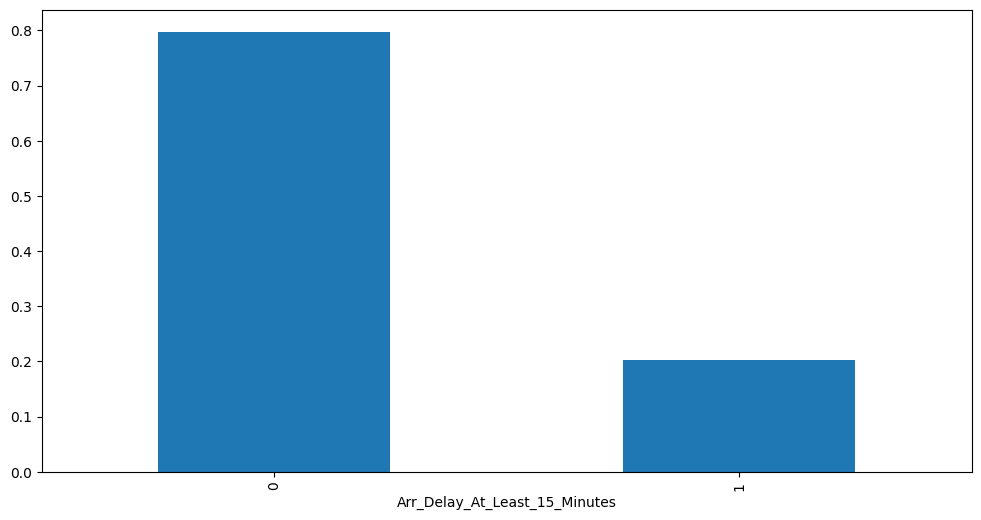

In [ ]:
# Create the bar plot and provide observations
plt.figure(figsize = (12, 6))

df['Arr_Delay_At_Least_15_Minutes'].value_counts(1).plot(kind = 'bar')

plt.show()

In [ ]:
# A quick view at the correlation matrix before we dig deeper into variables

#plt.figure(figsize=(10, 5))
#sns.heatmap(df.corr())
#sns.heatmap(df.corr(), annot=True, fmt=".2f")

In [ ]:
#checking data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777978 entries, 0 to 6777977
Data columns (total 43 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Carrier_Name                    object 
 1   Year                            int64  
 2   Quarter                         int64  
 3   Month                           object 
 4   Month_Day                       int64  
 5   Week_Day                        object 
 6   Flight_Date                     object 
 7   Airline_DOT_ID                  int64  
 8   Tail_Number                     object 
 9   Flight_Number                   int64  
 10  Origin_Airport_ID               int64  
 11  Origin_City_Market_ID           int64  
 12  Origin_IATA_Code                object 
 13  Origin_City_State               object 
 14  Destination_Airport_ID          int64  
 15  Destination_City_Market_ID      int64  
 16  Destination_IATA_Code           object 
 17  Destination_City_State     

In [ ]:
df['Month'].value_counts()

Month
Oct    596003
Aug    592142
Mar    585413
Jul    585058
May    575429
Dec    566941
Jun    562804
Nov    562413
Sep    560887
Apr    550249
Jan    525370
Feb    515269
Name: count, dtype: int64

In [ ]:
df['Week_Day'].value_counts()

Week_Day
Friday       1006397
Thursday     1002419
Monday        996731
Sunday        993917
Wednesday     954083
Tuesday       934067
Saturday      890364
Name: count, dtype: int64

In [ ]:
df['Dep_Time_Block_Group'].value_counts()

Dep_Time_Block_Group
Morning            1675136
Early Afternoon    1193596
Afternoon          1190516
Early Morning      1164971
Evening            1085963
Night               467796
Name: count, dtype: int64

In [ ]:
df['Arr_Time_Block_Group'].value_counts()

Arr_Time_Block_Group
Morning            1541215
Afternoon          1216839
Early Afternoon    1200361
Evening            1178993
Night              1084430
Early Morning       556140
Name: count, dtype: int64

In [ ]:
df['Carrier_Name'].value_counts()

Carrier_Name
Southwest Airlines Co.    1436531
Delta Air Lines Inc.       976593
American Airlines Inc.     938883
United Air Lines Inc.      724770
SkyWest Airlines Inc.      672768
Republic Airline           279059
Spirit Air Lines           257703
JetBlue Airways            257177
Alaska Airlines Inc.       236885
Envoy Air                  232730
Endeavor Air Inc.          197966
PSA Airlines Inc.          194108
Frontier Airlines Inc.     179063
Allegiant Air              114341
Hawaiian Airlines Inc.      79401
Name: count, dtype: int64

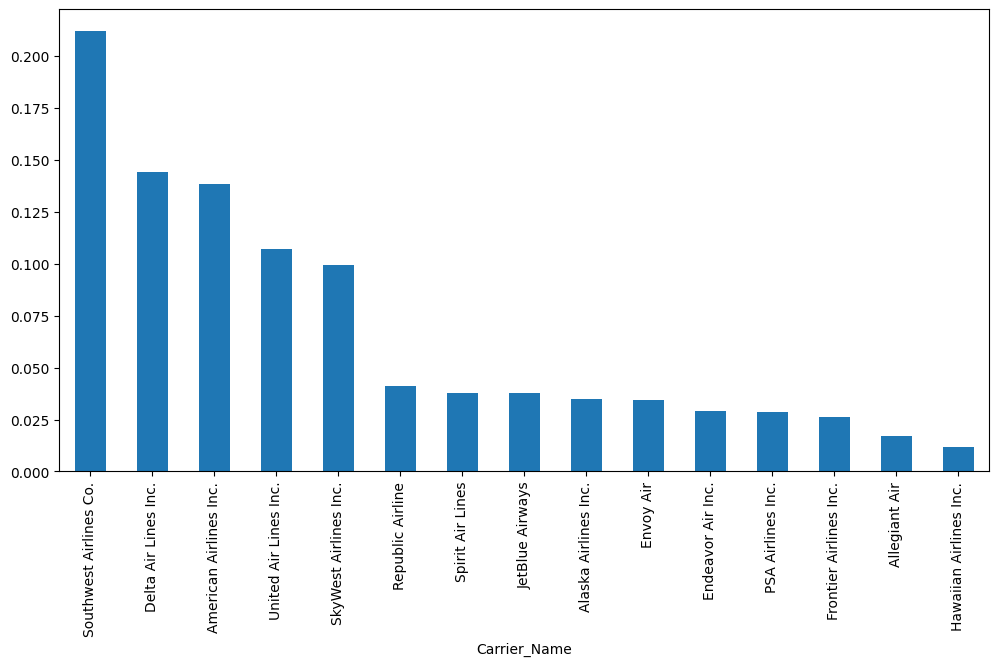

In [ ]:
#Carrier_Name

# Create the bar plot and provide observations
plt.figure(figsize = (12, 6))

df['Carrier_Name'].value_counts(1).plot(kind = 'bar')

plt.show()

<Axes: xlabel='count', ylabel='Carrier_Name'>

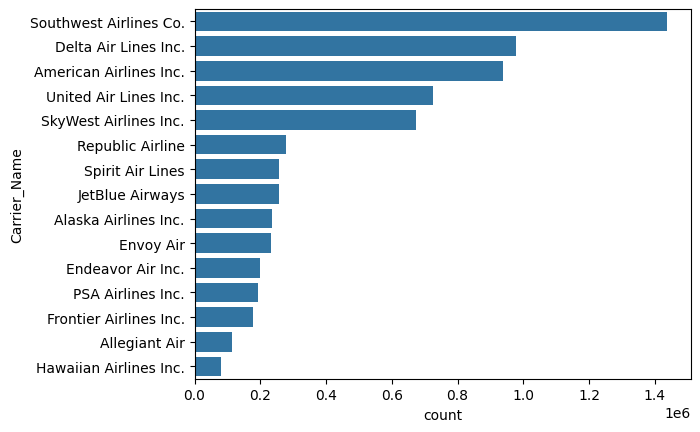

In [ ]:
sns.countplot(data=df, y ='Carrier_Name', order=df['Carrier_Name'].value_counts().index)

<Axes: xlabel='count', ylabel='Carrier_Name'>

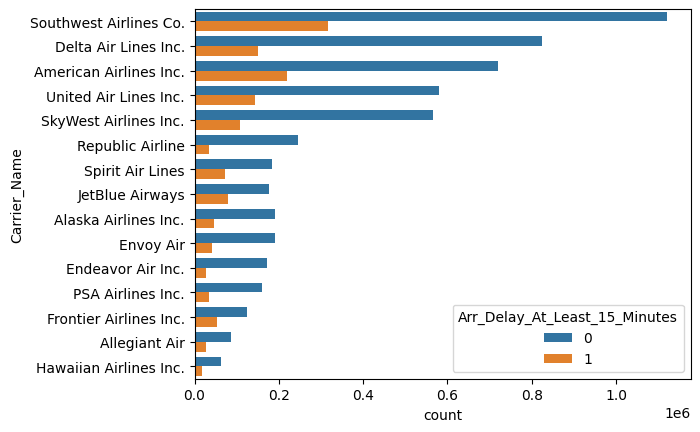

In [ ]:
# WE can see that Southwest and American Airlines have the most delays

sns.countplot(data=df, y ='Carrier_Name', hue = "Arr_Delay_At_Least_15_Minutes", order=df['Carrier_Name'].value_counts().index)

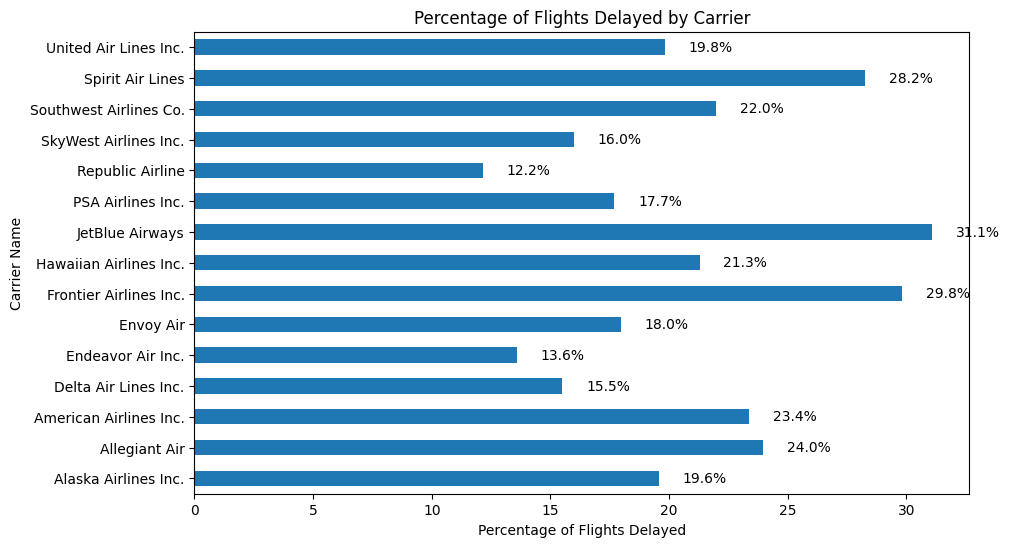

In [ ]:
# Calculate percentage of delayed flights per carrier
percentage_delayed = df.groupby('Carrier_Name')['Arr_Delay_At_Least_15_Minutes'].mean() * 100

# Create horizontal bar plot with percentages
plt.figure(figsize=(10, 6))
ax = percentage_delayed.plot(kind='barh')

# Add percentage labels to the bars
for i, v in enumerate(percentage_delayed):
    ax.text(v + 1, i, '{:.1f}%'.format(v), va='center')

# Customize plot labels and title
plt.xlabel('Percentage of Flights Delayed')
plt.ylabel('Carrier Name')
plt.title('Percentage of Flights Delayed by Carrier')

# Display the plot
plt.show()

In [ ]:
# Calculate total number of flights per carrier
total_flights = df['Carrier_Name'].value_counts()

# Calculate number of delayed flights per carrier
delayed_flights = df.groupby('Carrier_Name')['Arr_Delay_At_Least_15_Minutes'].sum()

# Calculate percentage of delayed flights per carrier
percentage_delayed = (delayed_flights / total_flights) * 100

# Create DataFrame to hold results
delay_info = pd.DataFrame({
    'Carrier_Name': total_flights.index,
    'Total_Flights': total_flights.values,
    'Delayed_Flights': delayed_flights.values,
    'Percentage_Delayed': percentage_delayed.values
})

print(delay_info)

              Carrier_Name  Total_Flights  Delayed_Flights  Percentage_Delayed
0   Southwest Airlines Co.        1436531            46348           19.565612
1     Delta Air Lines Inc.         976593            27399           23.962533
2   American Airlines Inc.         938883           219459           23.374478
3    United Air Lines Inc.         724770           151363           15.499087
4    SkyWest Airlines Inc.         672768            26899           13.587687
5         Republic Airline         279059            41799           17.960297
6         Spirit Air Lines         257703            53417           29.831400
7          JetBlue Airways         257177            16901           21.285626
8     Alaska Airlines Inc.         236885            79975           31.097260
9                Envoy Air         232730            34348           17.695304
10       Endeavor Air Inc.         197966            33922           12.155852
11       PSA Airlines Inc.         194108           

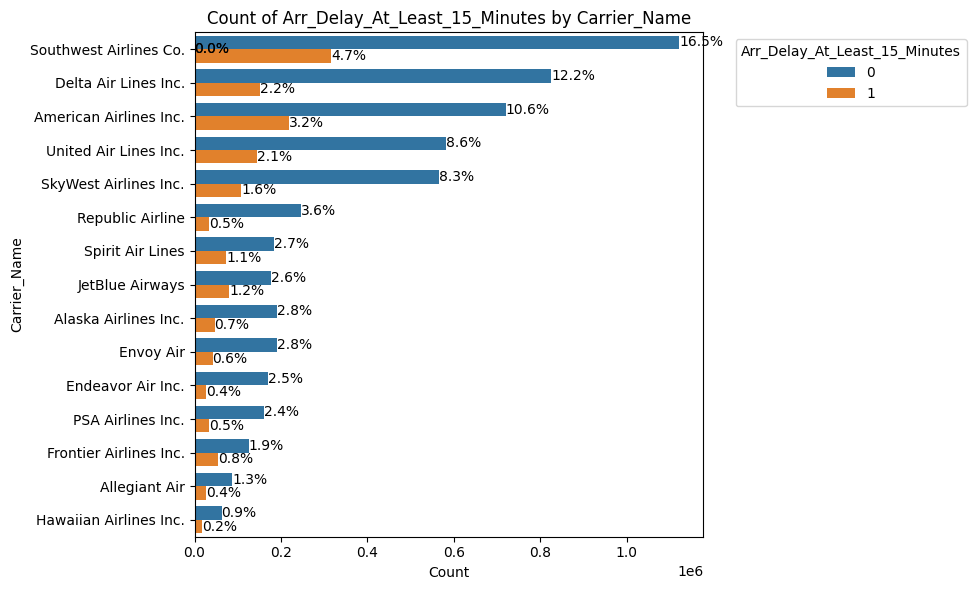

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create the countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='Carrier_Name', hue='Arr_Delay_At_Least_15_Minutes',
                   order=df['Carrier_Name'].value_counts().index)

# Add percentage labels
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / len(df))
    ax.annotate(percentage, (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.xlabel('Count')
plt.ylabel('Carrier_Name')
plt.title('Count of Arr_Delay_At_Least_15_Minutes by Carrier_Name')
plt.legend(title='Arr_Delay_At_Least_15_Minutes', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

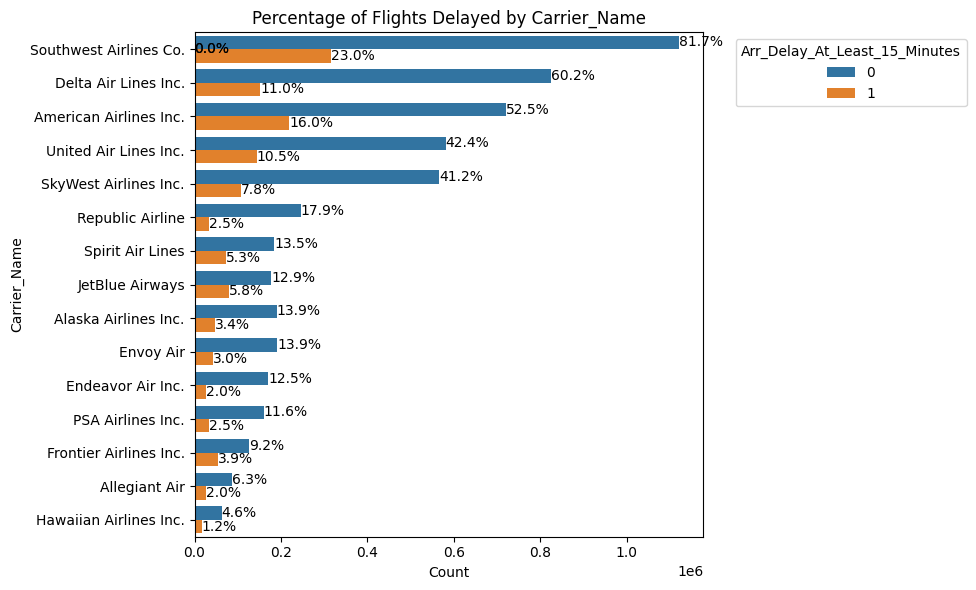

In [ ]:
# Calculate the total number of delayed flights
total_delayed_flights = len(df[df['Arr_Delay_At_Least_15_Minutes'] == True])

# Create the countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='Carrier_Name', hue='Arr_Delay_At_Least_15_Minutes',
                   order=df['Carrier_Name'].value_counts().index)

# Add percentage labels
for p in ax.patches:
    total_height = p.get_width()
    percentage = '{:.1f}%'.format(100 * total_height / total_delayed_flights)
    ax.annotate(percentage, (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='left', va='center')

# Customize plot labels and title
plt.xlabel('Count')
plt.ylabel('Carrier_Name')
plt.title('Percentage of Flights Delayed by Carrier_Name')
plt.legend(title='Arr_Delay_At_Least_15_Minutes', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ensure tight layout
plt.tight_layout()

# Display the plot
plt.show()

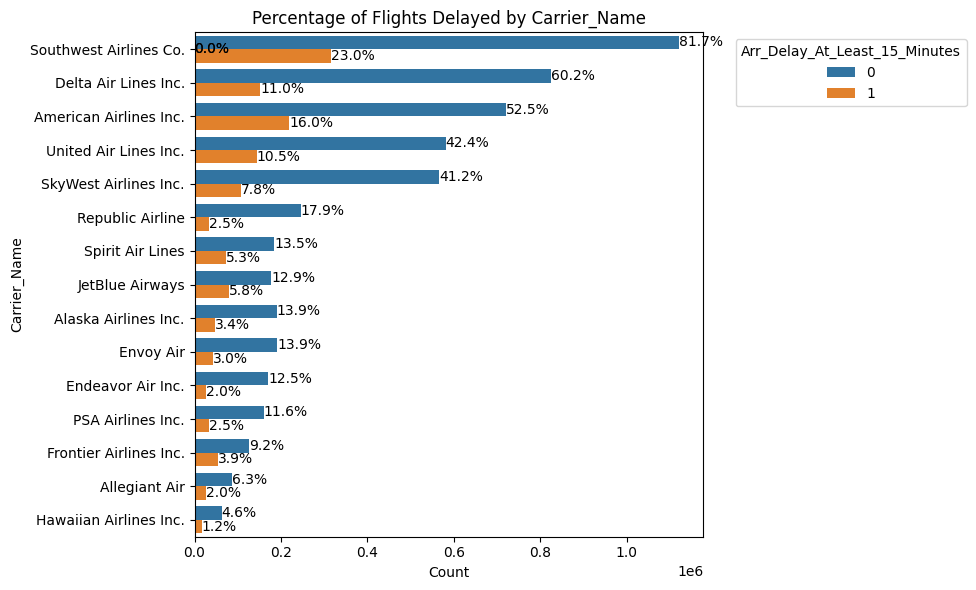

In [ ]:
# Calculate the total number of delayed flights
total_delayed_flights = len(df[df['Arr_Delay_At_Least_15_Minutes'] == True])

# Create the countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='Carrier_Name', hue='Arr_Delay_At_Least_15_Minutes',
                   order=df['Carrier_Name'].value_counts().index)

# Add percentage labels
for p in ax.patches:
    total_height = p.get_width()
    percentage = '{:.1f}%'.format(100 * total_height / total_delayed_flights)
    ax.annotate(percentage, (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='left', va='center')

# Customize plot labels and title
plt.xlabel('Count')
plt.ylabel('Carrier_Name')
plt.title('Percentage of Flights Delayed by Carrier_Name')
plt.legend(title='Arr_Delay_At_Least_15_Minutes', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ensure tight layout
plt.tight_layout()

# Display the plot
plt.show()

              Carrier_Name  Total_Flights  Delayed_Flights  Percentage_Delayed
0     Alaska Airlines Inc.         236885            46348           19.565612
1            Allegiant Air         114341            27399           23.962533
2   American Airlines Inc.         938883           219459           23.374478
3     Delta Air Lines Inc.         976593           151363           15.499087
4        Endeavor Air Inc.         197966            26899           13.587687
5                Envoy Air         232730            41799           17.960297
6   Frontier Airlines Inc.         179063            53417           29.831400
7   Hawaiian Airlines Inc.          79401            16901           21.285626
8          JetBlue Airways         257177            79975           31.097260
9        PSA Airlines Inc.         194108            34348           17.695304
10        Republic Airline         279059            33922           12.155852
11   SkyWest Airlines Inc.         672768           

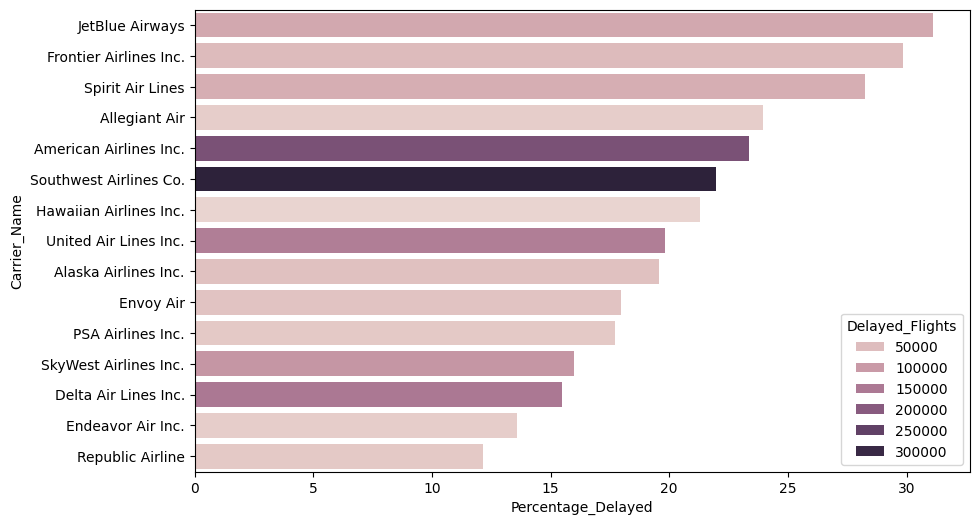

In [ ]:

# Calculate total number of flights per carrier
#flights_per_carrier = df['Carrier_Name'].value_counts()
flights_per_carrier = df.groupby('Carrier_Name')['Arr_Delay_At_Least_15_Minutes'].count()

# Calculate number of delayed flights per carrier
delayed_flights_per_carrier = df.groupby('Carrier_Name')['Arr_Delay_At_Least_15_Minutes'].sum()

# Create a DataFrame to hold the results
delay_info = pd.DataFrame({
    'Carrier_Name': flights_per_carrier.index,
    'Total_Flights': flights_per_carrier.values,
    'Delayed_Flights': delayed_flights_per_carrier.values
})

# Calculate percentage of delayed flights per carrier

delay_info['Percentage_Delayed'] = (delay_info['Delayed_Flights'] / delay_info['Total_Flights']) * 100

print(delay_info)

# Create the countplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=delay_info, y='Carrier_Name', x='Percentage_Delayed',
                 hue='Delayed_Flights', dodge=False, order=delay_info.sort_values('Percentage_Delayed', ascending=False)['Carrier_Name'])


Our baseline is 20% (exactly 20.2%) so anything greater than that might be significant.

In [ ]:

def delayed_by_feature(feature):

  # Calculate total number of flights per carrier
  #flights_per_carrier = df['Carrier_Name'].value_counts()
  flights_per_feature = df.groupby(feature)['Arr_Delay_At_Least_15_Minutes'].count()

  # Calculate number of delayed flights per carrier
  delayed_flights_per_feature = df.groupby(feature)['Arr_Delay_At_Least_15_Minutes'].sum()

  # Create a DataFrame to hold the results
  delay_info = pd.DataFrame({
      'Feature_class': flights_per_feature.index,
      'Total_Flights': flights_per_feature.values,
      'Delayed_Flights': delayed_flights_per_feature.values
  })

  # Calculate percentage of delayed flights per carrier

  delay_info['Percentage_Delayed'] = (delay_info['Delayed_Flights'] / delay_info['Total_Flights']) * 100

  print(delay_info.sort_values(by='Percentage_Delayed',ascending=False))

  #return(delay_info.sort_values(by='Percentage_Delayed',ascending=False))


  # Create the countplot
  #plt.figure(figsize=(10, 6))
  #ax = sns.barplot(data=delay_info, y='Feature_class', x='Percentage_Delayed',
  #                hue='Delayed_Flights', dodge=False, order=delay_info.sort_values('Percentage_Delayed', ascending=False)[feature])

In [ ]:

def delayed_by_feature_plot(feature):

  # Calculate total number of flights per carrier
  #flights_per_carrier = df['Carrier_Name'].value_counts()
  flights_per_feature = df.groupby(feature)['Arr_Delay_At_Least_15_Minutes'].count()

  # Calculate number of delayed flights per carrier
  delayed_flights_per_feature = df.groupby(feature)['Arr_Delay_At_Least_15_Minutes'].sum()

  # Create a DataFrame to hold the results
  delay_info = pd.DataFrame({
      'Feature_class': flights_per_feature.index,
      'Total_Flights': flights_per_feature.values,
      'Delayed_Flights': delayed_flights_per_feature.values
  })

  # Calculate percentage of delayed flights per carrier

  delay_info['Percentage_Delayed'] = (delay_info['Delayed_Flights'] / delay_info['Total_Flights']) * 100

  print(delay_info.sort_values(by='Percentage_Delayed',ascending=False))

  # Create the countplot
  plt.figure(figsize=(10, 6))
  ax = sns.barplot(data=delay_info, y='Feature_class', x='Percentage_Delayed', hue='Delayed_Flights', dodge=False, order=delay_info.sort_values('Percentage_Delayed', ascending=False)['Feature_class'])

             Feature_class  Total_Flights  Delayed_Flights  Percentage_Delayed
8          JetBlue Airways         257177            79975           31.097260
6   Frontier Airlines Inc.         179063            53417           29.831400
13        Spirit Air Lines         257703            72797           28.248410
1            Allegiant Air         114341            27399           23.962533
2   American Airlines Inc.         938883           219459           23.374478
12  Southwest Airlines Co.        1436531           315680           21.975161
7   Hawaiian Airlines Inc.          79401            16901           21.285626
14   United Air Lines Inc.         724770           143586           19.811250
0     Alaska Airlines Inc.         236885            46348           19.565612
5                Envoy Air         232730            41799           17.960297
9        PSA Airlines Inc.         194108            34348           17.695304
11   SkyWest Airlines Inc.         672768           

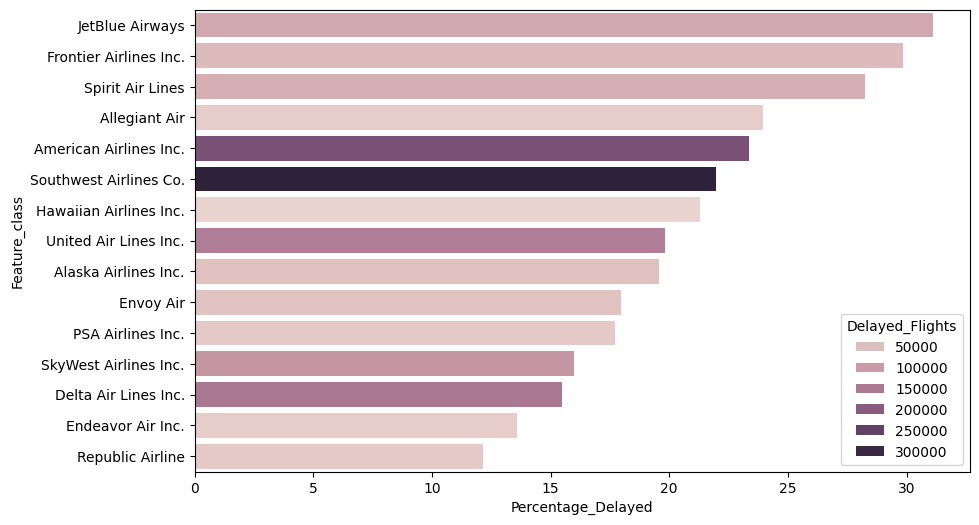

In [ ]:
delayed_by_feature_plot('Carrier_Name')

In [ ]:
delayed_by_feature('Carrier_Name')

             Feature_class  Total_Flights  Delayed_Flights  Percentage_Delayed
8          JetBlue Airways         257177            79975           31.097260
6   Frontier Airlines Inc.         179063            53417           29.831400
13        Spirit Air Lines         257703            72797           28.248410
1            Allegiant Air         114341            27399           23.962533
2   American Airlines Inc.         938883           219459           23.374478
12  Southwest Airlines Co.        1436531           315680           21.975161
7   Hawaiian Airlines Inc.          79401            16901           21.285626
14   United Air Lines Inc.         724770           143586           19.811250
0     Alaska Airlines Inc.         236885            46348           19.565612
5                Envoy Air         232730            41799           17.960297
9        PSA Airlines Inc.         194108            34348           17.695304
11   SkyWest Airlines Inc.         672768           

In [ ]:
percentage_delayed_flight_per_carrier.sort_values(ascending=False)

NameError: name 'percentage_delayed_flight_per_carrier' is not defined

In [ ]:
# Quarter

df['Quarter'].value_counts()

Quarter
3    1738087
4    1725357
2    1688482
1    1626052
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Quarter'>

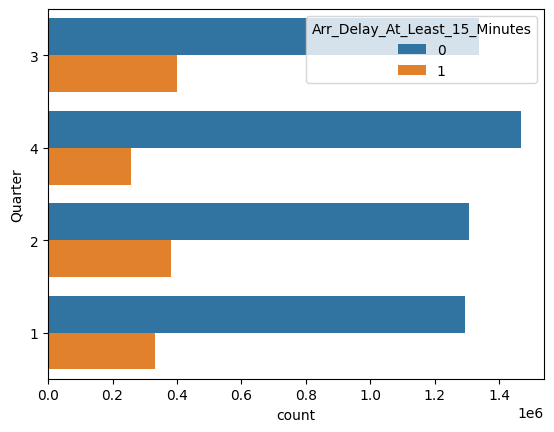

In [ ]:
# 1st and 2nd quarter have the most delays although they have the least flights, weather?

sns.countplot(data=df, y ='Quarter', hue = "Arr_Delay_At_Least_15_Minutes", order=df['Quarter'].value_counts().index)

In [ ]:
delayed_by_feature('Quarter')

   Feature_class  Total_Flights  Delayed_Flights  Percentage_Delayed
2              3        1738087           400218           23.026350
1              2        1688482           382269           22.639803
0              1        1626052           330478           20.323950
3              4        1725357           258486           14.981595


Month
Oct    596003
Aug    592142
Mar    585413
Jul    585058
May    575429
Dec    566941
Jun    562804
Nov    562413
Sep    560887
Apr    550249
Jan    525370
Feb    515269
Name: count, dtype: int64
   Feature_class  Total_Flights  Delayed_Flights  Percentage_Delayed
5            Jul         585058           167080           28.557852
6            Jun         562804           152268           27.055245
4            Jan         525370           126410           24.061138
0            Apr         550249           125882           22.877279
1            Aug         592142           128439           21.690574
7            Mar         585413           122032           20.845454
11           Sep         560887           104699           18.666683
8            May         575429           104119           18.094152
3            Feb         515269            82036           15.921004
2            Dec         566941            89153           15.725269
10           Oct         596003          

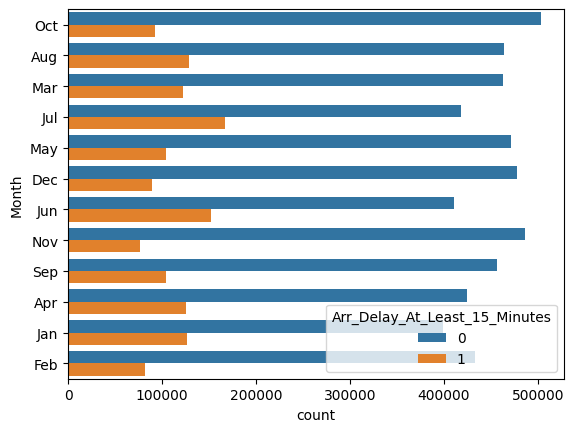

In [ ]:
sns.countplot(data=df, y ='Month', hue = "Arr_Delay_At_Least_15_Minutes", order=df['Month'].value_counts().index)
print(df['Month'].value_counts())
delayed_by_feature('Month')

In [ ]:
# Week_Day_num
df['Week_Day'].value_counts()

Week_Day_num
5    1006397
4    1002419
1     996731
7     993917
3     954083
2     934067
6     890364
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Week_Day'>

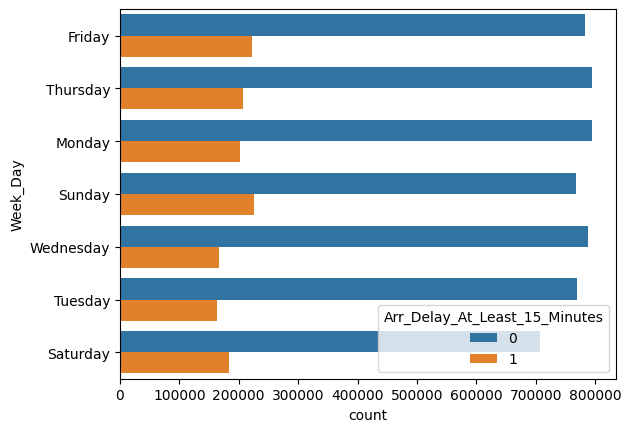

In [ ]:
sns.countplot(data=df, y ='Week_Day', hue = "Arr_Delay_At_Least_15_Minutes", order=df['Week_Day'].value_counts().index)

In [ ]:
# Our baseline is 20% (exactly 20.2%) so anything greater than that might be significant.
delayed_by_feature('Week_Day')

  Feature_class  Total_Flights  Delayed_Flights  Percentage_Delayed
3        Sunday         993917           225513           22.689319
0        Friday        1006397           222892           22.147522
4      Thursday        1002419           207300           20.679975
2      Saturday         890364           183081           20.562489
1        Monday         996731           201586           20.224715
5       Tuesday         934067           164199           17.578932
6     Wednesday         954083           166880           17.491141


In [ ]:
# Looks like weekends has the least flights but the most delays..

In [ ]:
delayed_by_feature('Quarter')

   Feature_class  Total_Flights  Delayed_Flights  Percentage_Delayed
2              3        1738087           400218           23.026350
1              2        1688482           382269           22.639803
0              1        1626052           330478           20.323950
3              4        1725357           258486           14.981595


In [ ]:
# Dep_Time_Block_Group_num
df['Dep_Time_Block_Group'].value_counts()

Dep_Time_Block_Group_num
2    1675136
3    1193596
4    1190516
1    1164971
5    1085963
6     467796
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Dep_Time_Block_Group_num'>

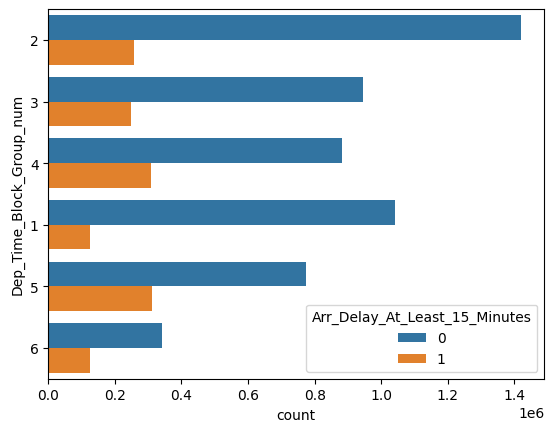

In [ ]:
sns.countplot(data=df, y ='Dep_Time_Block_Group', hue = "Arr_Delay_At_Least_15_Minutes", order=df['Dep_Time_Block_Group'].value_counts().index)

In [ ]:
delayed_by_feature('Dep_Time_Block_Group')

     Feature_class  Total_Flights  Delayed_Flights  Percentage_Delayed
3          Evening        1085963           311197           28.656317
5            Night         467796           125100           26.742426
0        Afternoon        1190516           307259           25.808893
1  Early Afternoon        1193596           247230           20.713039
4          Morning        1675136           256402           15.306339
2    Early Morning        1164971           124263           10.666617


In [ ]:

#sns.countplot(data=df, y='Dep_Time_Block_Group_num', hue='Arr_Delay_At_Least_15_Minutes', order=df['Dep_Time_Block_Group_num'].value_counts().index);
#for p in plt.gca().patches:
#  txt = str(p.get_width().round(1)) + '%' ;
#  plt.gca().annotate(txt, (p.get_width() + 1 , p.get_y() + p.get_height() / 2), ha='left', va='center')




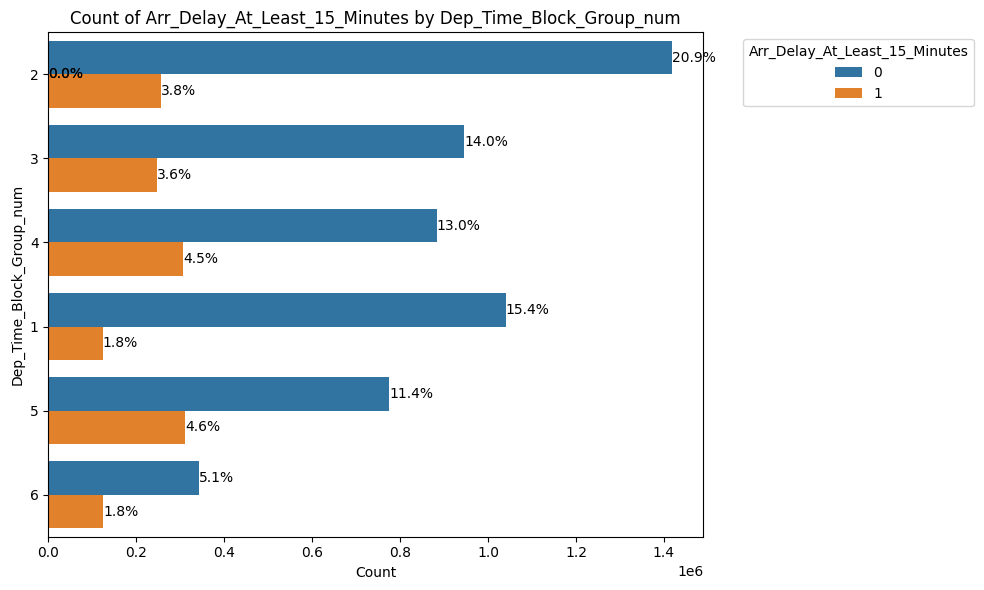

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create the countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='Dep_Time_Block_Group', hue='Arr_Delay_At_Least_15_Minutes',
                   order=df['Dep_Time_Block_Group'].value_counts().index)

# Add percentage labels
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / len(df))
    ax.annotate(percentage, (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.xlabel('Count')
plt.ylabel('Dep_Time_Block_Group')
plt.title('Count of Arr_Delay_At_Least_15_Minutes by Dep_Time_Block_Group')
plt.legend(title='Arr_Delay_At_Least_15_Minutes', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
#Origin_Airport_ID
df['Origin_Airport_ID'].value_counts()

Origin_Airport_ID
10397    333791
11298    289808
11292    287196
13930    255248
11057    196548
12892    192175
12889    187501
14107    178922
13204    164880
14747    161535
12953    156074
11278    136799
10721    135565
14771    133104
11618    129445
12478    124821
11433    123954
13487    120886
14869    109872
12266    109441
13303    105527
10821     95782
10693     95261
11697     90193
14679     90176
14100     89617
10423     89464
13232     82109
15304     78782
11259     74083
15016     62101
12173     61386
14492     58816
14057     57238
12191     55924
14893     52191
14831     50336
12264     49550
13495     49192
13198     48330
12339     45083
13796     44902
14908     44293
14122     41425
11042     40934
11066     40808
14683     40124
11193     39718
14635     34751
14843     32949
10800     28945
13830     28519
12451     28391
14027     27611
13342     26597
10994     24367
13891     24133
10140     23689
14730     23502
13871     22738
13244     22414
13851 

In [ ]:
delayed_by_feature('Origin_Airport_ID')

     Feature_class  Total_Flights  Delayed_Flights  Percentage_Delayed
310          14905            107               53           49.532710
294          14716            522              234           44.827586
154          12223            390              160           41.025641
28           10551            706              269           38.101983
245          14025            396              133           33.585859
49           10754            346              116           33.526012
176          12544            754              250           33.156499
119          11697          90193            28607           31.717539
46           10732           2841              879           30.939810
145          12119            213               64           30.046948
19           10372           6329             1900           30.020540
263          14254           1114              329           29.533214
229          13541           1088              321           29.503676
306   

In [ ]:
delayed_by_feature('Origin_City_Market_ID')

     Feature_class  Total_Flights  Delayed_Flights  Percentage_Delayed
297          34905            107               53           49.532710
288          34716            522              234           44.827586
165          32223            390              160           41.025641
3            30113            706              269           38.101983
247          34025            396              133           33.585859
2            30107            346              116           33.526012
185          32544            754              250           33.156499
61           30732           2841              879           30.939810
180          32467         195720            58962           30.125690
158          32119            213               64           30.046948
28           30372           6329             1900           30.020540
261          34254           1114              329           29.533214
232          33541           1088              321           29.503676
293   

In [ ]:
delayed_by_feature('Origin_IATA_Code')

    Feature_class  Total_Flights  Delayed_Flights  Percentage_Delayed
309           SMX            107               53           49.532710
293           SCK            522              234           44.827586
154           HTS            390              160           41.025641
28            BET            706              269           38.101983
244           PBG            396              133           33.585859
49            BRW            346              116           33.526012
337           USA            754              250           33.156499
119           FLL          90193            28607           31.717539
46            BQN           2841              879           30.939810
145           HGR            213               64           30.046948
19            ASE           6329             1900           30.020540
262           PSE           1114              329           29.533214
228           MVY           1088              321           29.503676
305           SJU   

Origin_IATA_Code
ATL    333791
DFW    289808
DEN    287196
ORD    255248
CLT    196548
LAX    192175
LAS    187501
PHX    178922
MCO    164880
SEA    161535
LGA    156074
DCA    136799
BOS    135565
SFO    133104
EWR    129445
JFK    124821
DTW    123954
MSP    120886
SLC    109872
IAH    109441
MIA    105527
BWI     95782
BNA     95261
FLL     90193
SAN     90176
PHL     89617
AUS     89464
MDW     82109
TPA     78782
DAL     74083
STL     62101
HNL     61386
RDU     58816
PDX     57238
HOU     55924
SMF     52191
SJC     50336
IAD     49550
MSY     49192
MCI     48330
IND     45083
OAK     44902
SNA     44293
PIT     41425
CLE     40934
CMH     40808
SAT     40124
CVG     39718
RSW     34751
SJU     32949
BUR     28945
OGG     28519
JAX     28391
PBI     27611
MKE     26597
CHS     24367
ONT     24133
ABQ     23689
SDF     23502
OMA     22738
MEM     22414
OKC     21263
ORF     20788
BDL     20675
BOI     20656
BUF     20374
RNO     19493
RIC     18107
SAV     17552
ANC     17332
GRR

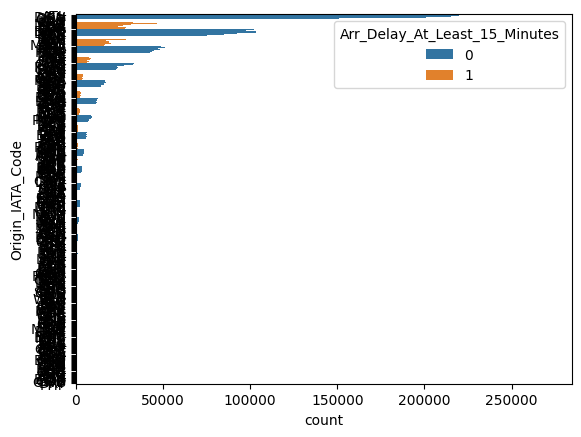

In [ ]:
sns.countplot(data=df, y ='Origin_IATA_Code', hue = "Arr_Delay_At_Least_15_Minutes", order=df['Origin_IATA_Code'].value_counts().index)
print(df['Origin_IATA_Code'].value_counts())
delayed_by_feature('Origin_IATA_Code')

Origin_City_State
Chicago, IL                           337357
Atlanta, GA                           333791
Dallas/Fort Worth, TX                 289808
Denver, CO                            287196
New York, NY                          280895
Charlotte, NC                         196548
Los Angeles, CA                       192175
Las Vegas, NV                         187501
Washington, DC                        186349
Phoenix, AZ                           184344
Houston, TX                           165365
Orlando, FL                           164880
Seattle, WA                           161535
Boston, MA                            135565
San Francisco, CA                     133104
Newark, NJ                            129445
Detroit, MI                           123954
Minneapolis, MN                       120886
Salt Lake City, UT                    109872
Miami, FL                             105527
Baltimore, MD                          95782
Nashville, TN                        

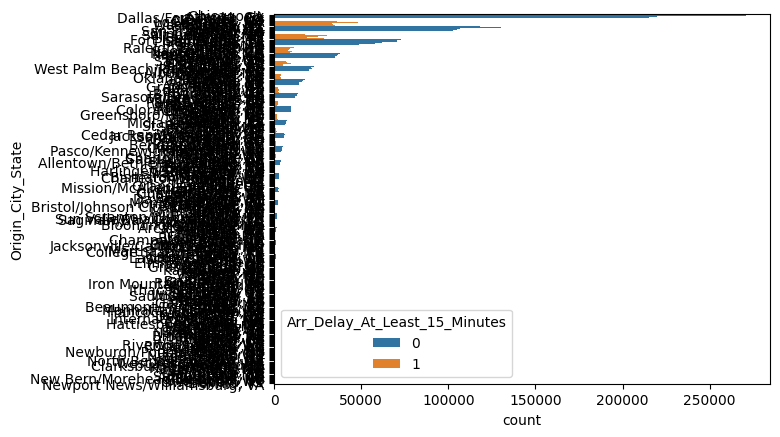

In [ ]:
sns.countplot(data=df, y ='Origin_City_State', hue = "Arr_Delay_At_Least_15_Minutes", order=df['Origin_City_State'].value_counts().index)
print(df['Origin_City_State'].value_counts())
delayed_by_feature('Origin_City_State')

In [ ]:
sns.countplot(data=df, y ='Dep_Time_Block_Group', hue = "Arr_Delay_At_Least_15_Minutes", order=df['Dep_Time_Block_Group'].value_counts().index)

In [ ]:
#Scheduled_Departure_Time

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777978 entries, 0 to 6777977
Data columns (total 47 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Carrier_Name                    object 
 1   Year                            int64  
 2   Quarter                         int64  
 3   Month                           object 
 4   Month_Day                       int64  
 5   Week_Day                        object 
 6   Flight_Date                     object 
 7   Airline_DOT_ID                  int64  
 8   Tail_Number                     object 
 9   Flight_Number                   int64  
 10  Origin_Airport_ID               int64  
 11  Origin_City_Market_ID           int64  
 12  Origin_IATA_Code                object 
 13  Origin_City_State               object 
 14  Destination_Airport_ID          int64  
 15  Destination_City_Market_ID      int64  
 16  Destination_IATA_Code           object 
 17  Destination_City_State     

In [ ]:
df.dtypes != 'object'

Carrier_Name                      False
Year                               True
Quarter                            True
Month                             False
Month_Day                          True
Week_Day                          False
Flight_Date                       False
Airline_DOT_ID                     True
Tail_Number                       False
Flight_Number                      True
Origin_Airport_ID                  True
Origin_City_Market_ID              True
Origin_IATA_Code                  False
Origin_City_State                 False
Destination_Airport_ID             True
Destination_City_Market_ID         True
Destination_IATA_Code             False
Destination_City_State            False
Dep_Time_Block_Group              False
Scheduled_Departure_Time           True
Actual_Dep_Time                    True
Dep_Time_Offset                    True
Dep_Delay_Minutes                  True
Dep_Delay_At_Least_15_Minutes      True
Scheduled_Arrival_Time             True


In [ ]:
# df[(df.dtypes != 'object') == True]

df_num = df[df.columns[df.dtypes != 'object']]

In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777978 entries, 0 to 6777977
Data columns (total 36 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Year                            int64  
 1   Quarter                         int64  
 2   Month_Day                       int64  
 3   Airline_DOT_ID                  int64  
 4   Flight_Number                   int64  
 5   Origin_Airport_ID               int64  
 6   Origin_City_Market_ID           int64  
 7   Destination_Airport_ID          int64  
 8   Destination_City_Market_ID      int64  
 9   Scheduled_Departure_Time        int64  
 10  Actual_Dep_Time                 int64  
 11  Dep_Time_Offset                 int64  
 12  Dep_Delay_Minutes               int64  
 13  Dep_Delay_At_Least_15_Minutes   int64  
 14  Scheduled_Arrival_Time          int64  
 15  Actual_Arr_Time                 int64  
 16  Arr_Time_Offset                 int64  
 17  Arr_Delay_Minutes          

In [ ]:
# Here are numerical variables that I suspect might be important for this dataset

#  Scheduled_Departure_Time        int64
#  Actual_Dep_Time                 int64

# Scheduled_Arrival_Time          int64

#  Scheduled_Gate_to_Gate_Time     int64
#  Actual_Gate_to_Gate_Time        int64
#  Time_Airborne                   int64
#  Number_of_Flights               int64

#  Distance_Miles                  int64
#  Distance_Group                  int64




In [ ]:
# Distance_Group
df['Distance_Group'].value_counts()

Distance_Group
2     1537278
3     1357844
4     1125895
5      790573
1      777142
6      314425
7      302250
10     173193
8      148064
11     140112
9      111202
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Distance_Group'>

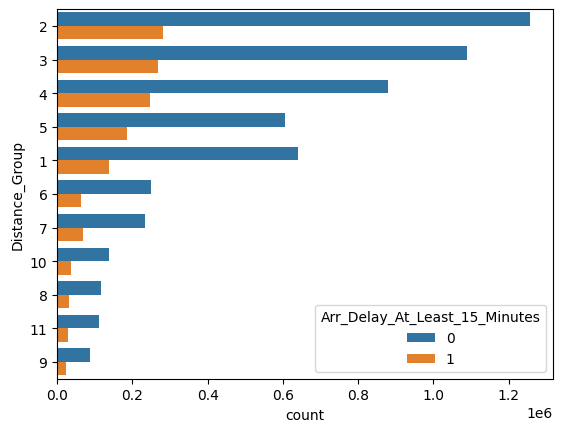

In [ ]:
# Distance_Group
sns.countplot(data=df, y ='Distance_Group', hue = "Arr_Delay_At_Least_15_Minutes", order=df['Distance_Group'].value_counts().index)

In [ ]:
delayed_by_feature('Distance_Group')

    Feature_class  Total_Flights  Delayed_Flights  Percentage_Delayed
4               5         790573           185827           23.505356
6               7         302250            67567           22.354673
3               4        1125895           245562           21.810382
8               9         111202            23991           21.574252
10             11         140112            30029           21.432140
7               8         148064            31107           21.009158
9              10         173193            36356           20.991611
5               6         314425            64376           20.474199
2               3        1357844           267365           19.690406
1               2        1537278           281795           18.330777
0               1         777142           137476           17.689946


In [ ]:
df.Scheduled_Departure_Time.head(5)

0    1926
1    2051
2    2328
3     600
4    1116
Name: Scheduled_Departure_Time, dtype: int64

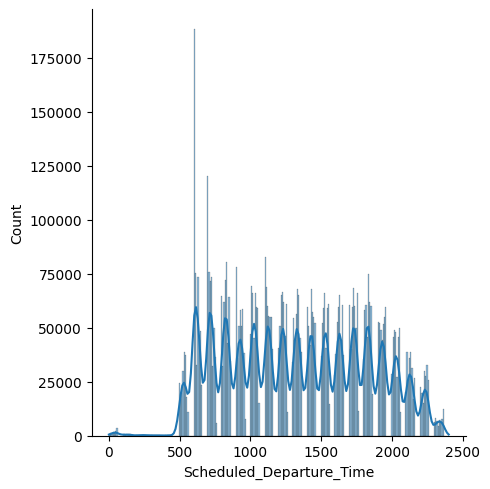

In [ ]:
sns.displot(data=df, x='Scheduled_Departure_Time', kde=True)

In [ ]:
delayed_by_feature('Scheduled_Departure_Time')

      Feature_class  Total_Flights  Delayed_Flights  Percentage_Delayed
138             246              1                1          100.000000
96              141              1                1          100.000000
103             148              1                1          100.000000
66              107              1                1          100.000000
173             327              1                1          100.000000
142             251              4                3           75.000000
143             252              3                2           66.666667
184             339              3                2           66.666667
183             338              6                4           66.666667
158             307              6                4           66.666667
113             202             21               14           66.666667
135             243              5                3           60.000000
162             312             12                7           58

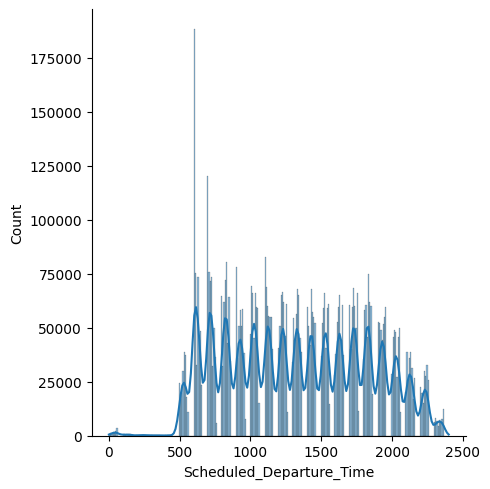

In [ ]:
sns.displot(data=df, x='Scheduled_Departure_Time', kde=True)

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

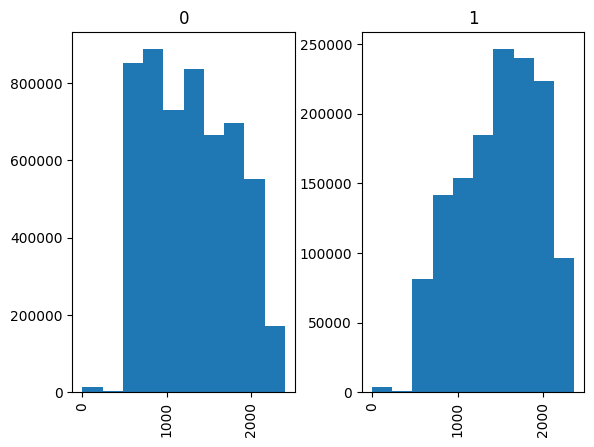

In [ ]:
df.hist(by='Arr_Delay_At_Least_15_Minutes',column = 'Scheduled_Departure_Time')

<Axes: xlabel='Arr_Delay_At_Least_15_Minutes', ylabel='Scheduled_Departure_Time'>

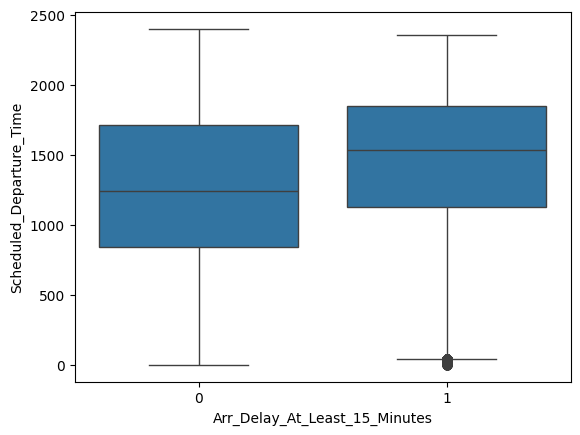

In [ ]:
sns.boxplot(x="Arr_Delay_At_Least_15_Minutes", y="Scheduled_Departure_Time", data=df)

<Axes: title={'center': 'Scheduled_Departure_Time'}, xlabel='Arr_Delay_At_Least_15_Minutes'>

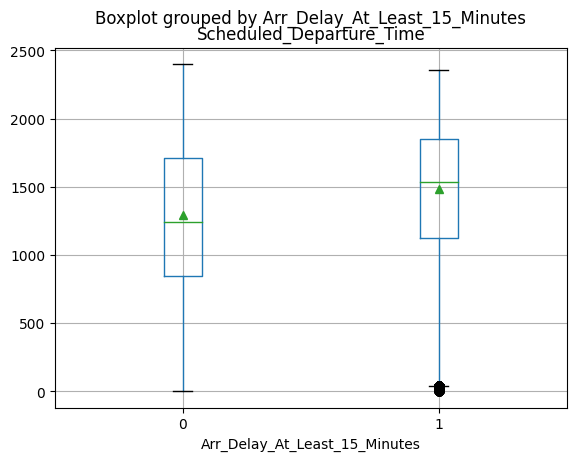

In [ ]:
# slightly different visual to show the same thing

df.boxplot(column='Scheduled_Departure_Time', by='Arr_Delay_At_Least_15_Minutes', showmeans=True)

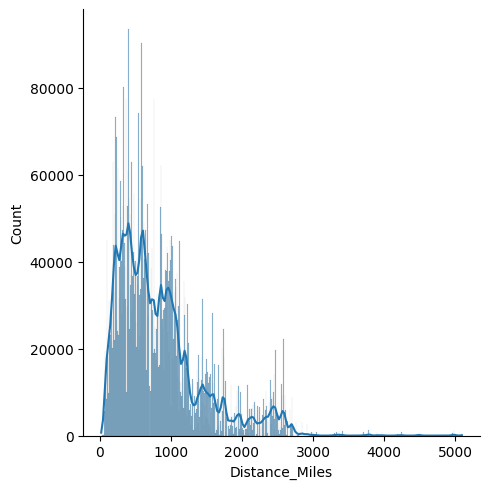

In [ ]:
sns.displot(data=df, x='Distance_Miles', kde=True)

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

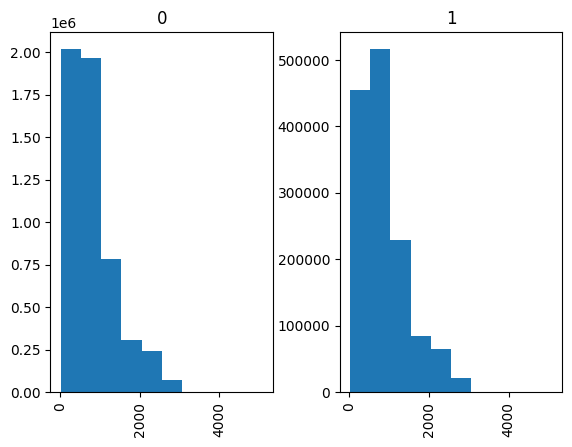

In [ ]:
df.hist(by='Arr_Delay_At_Least_15_Minutes',column = 'Distance_Miles')

<Axes: title={'center': 'Distance_Miles'}, xlabel='Arr_Delay_At_Least_15_Minutes'>

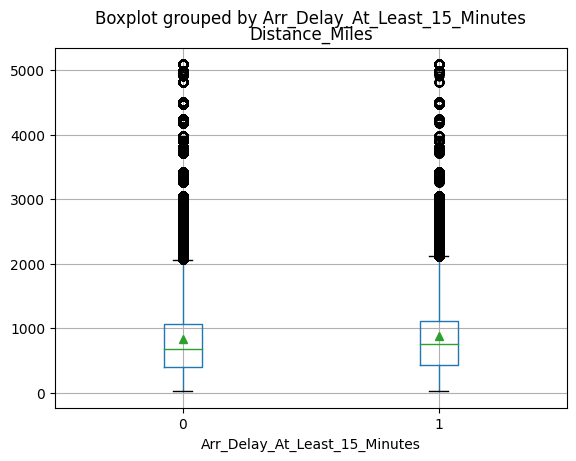

In [ ]:
# slightly different visual to show the same thing

df.boxplot(column='Distance_Miles', by='Arr_Delay_At_Least_15_Minutes', showmeans=True)

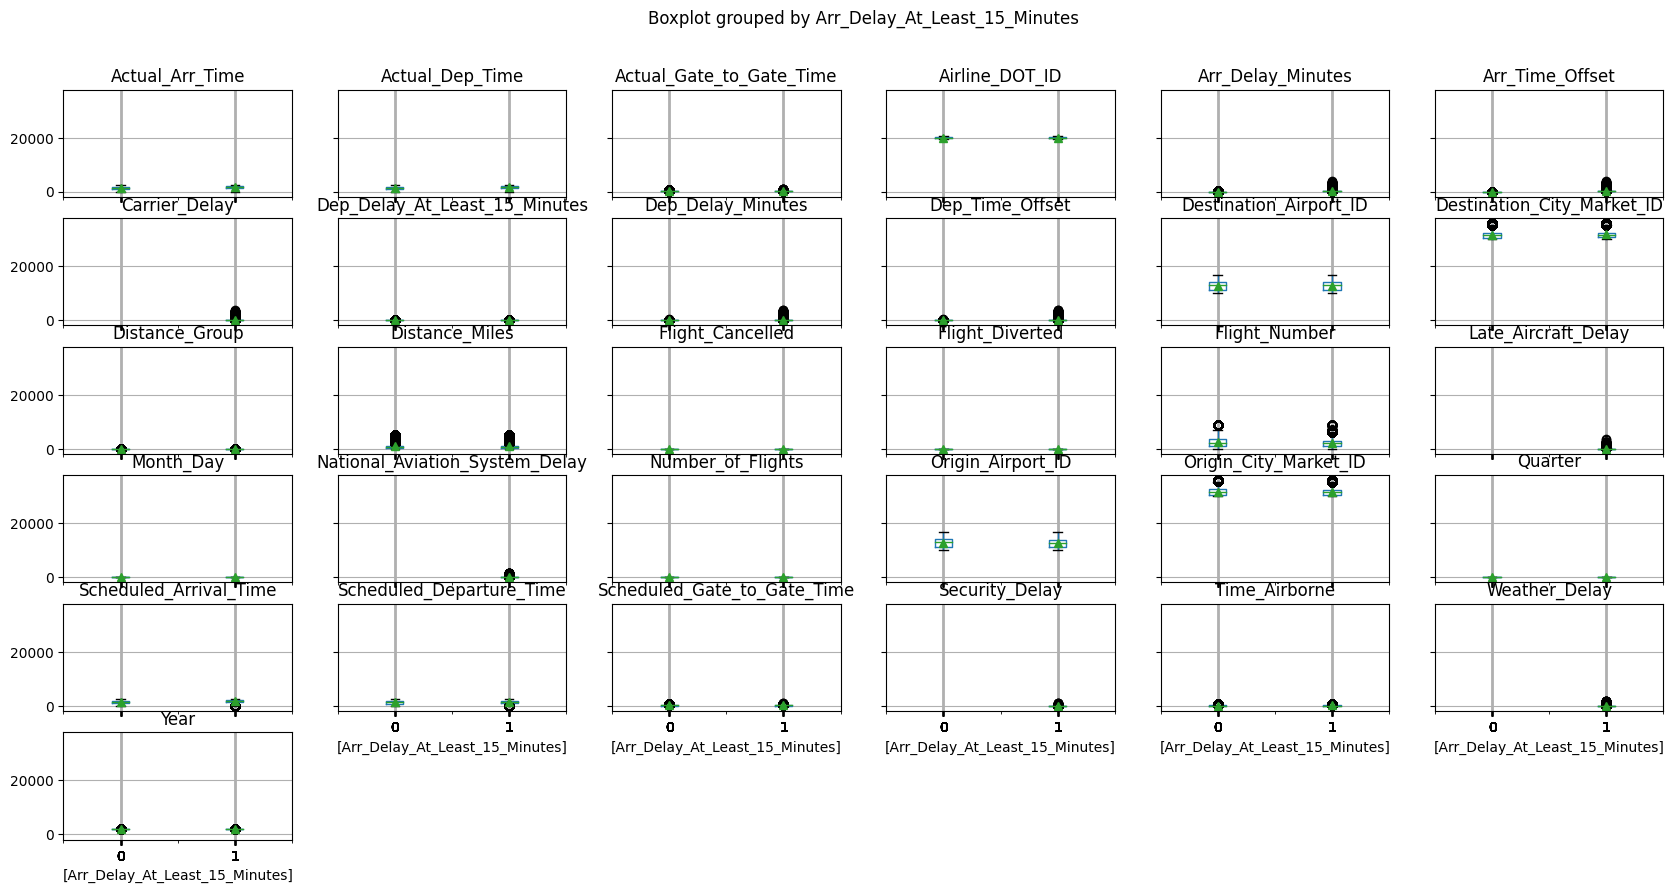

In [ ]:
df.boxplot(by='Arr_Delay_At_Least_15_Minutes', showmeans=True, figsize=(20,10));

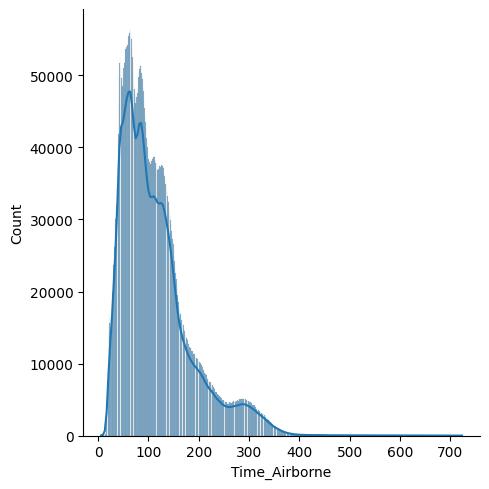

In [ ]:
#Time_Airborne
sns.displot(data=df, x='Time_Airborne', kde=True)

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

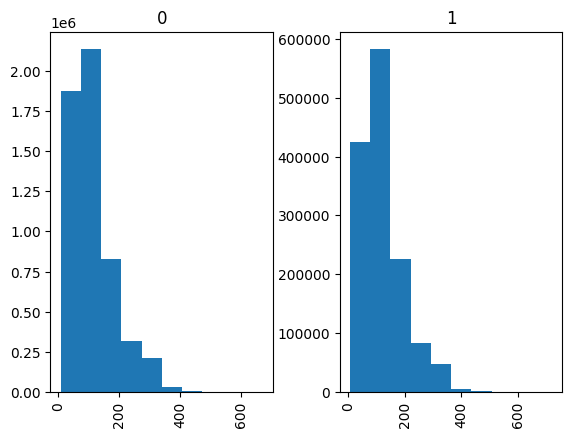

In [ ]:
df.hist(by='Arr_Delay_At_Least_15_Minutes',column = 'Time_Airborne')

<Axes: xlabel='Arr_Delay_At_Least_15_Minutes', ylabel='Time_Airborne'>

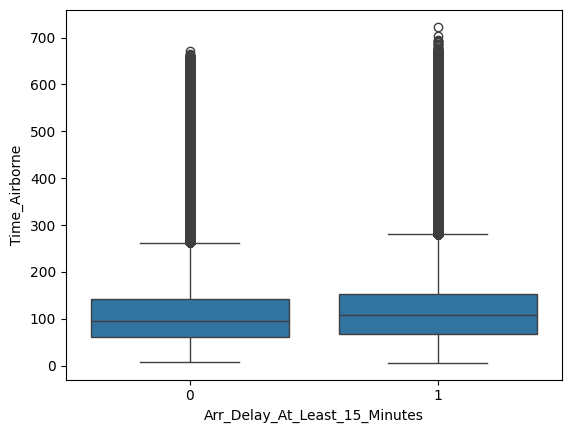

In [ ]:
sns.boxplot(x="Arr_Delay_At_Least_15_Minutes", y="Time_Airborne", data=df)

In [ ]:
df.Number_of_Flights.head(5)

0    1
1    1
2    1
3    1
4    1
Name: Number_of_Flights, dtype: int64

In [ ]:
df.Number_of_Flights.describe()

count    6777978.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: Number_of_Flights, dtype: float64

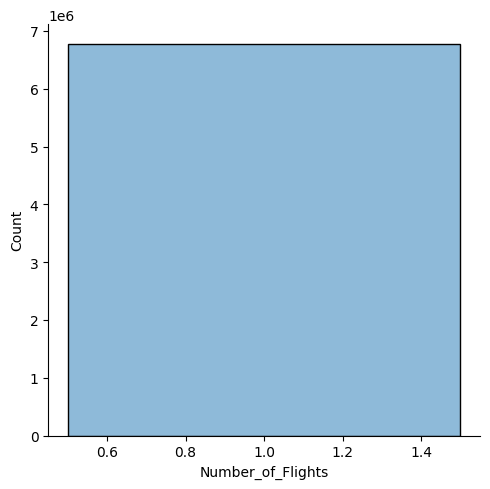

In [ ]:
#Number_of_Flights
sns.displot(data=df, x='Number_of_Flights', kde=True)

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

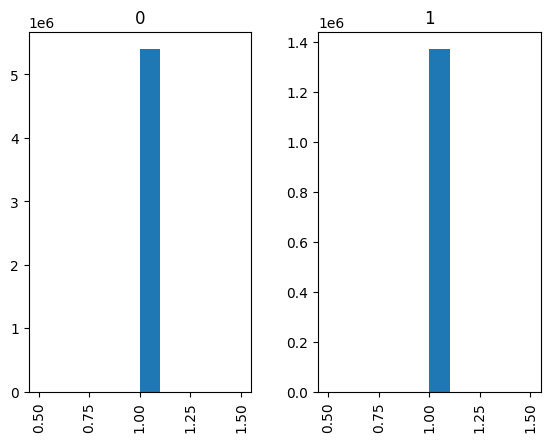

In [ ]:
df.hist(by='Arr_Delay_At_Least_15_Minutes',column = 'Number_of_Flights')

<Axes: xlabel='Arr_Delay_At_Least_15_Minutes', ylabel='Number_of_Flights'>

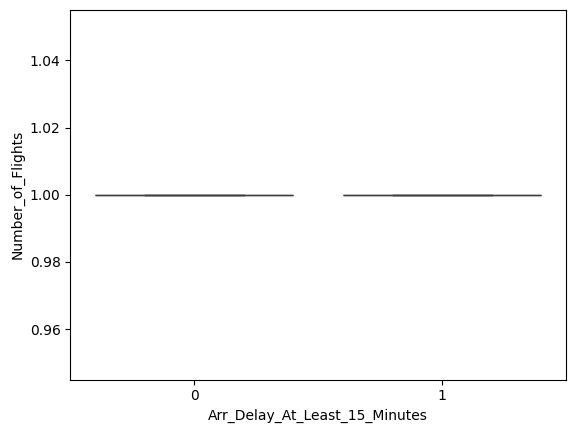

In [ ]:
sns.boxplot(x="Arr_Delay_At_Least_15_Minutes", y="Number_of_Flights", data=df)

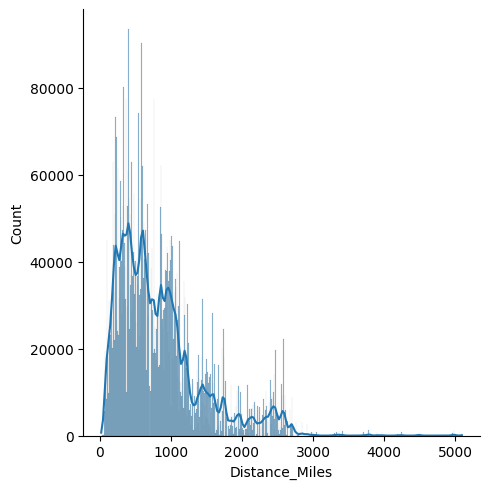

In [ ]:
#Time_Airborne
sns.displot(data=df, x='Distance_Miles', kde=True)


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

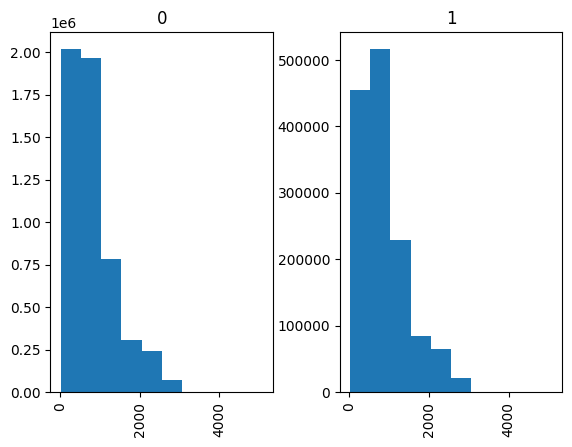

In [ ]:
df.hist(by='Arr_Delay_At_Least_15_Minutes',column = 'Distance_Miles')



<Axes: xlabel='Arr_Delay_At_Least_15_Minutes', ylabel='Distance_Miles'>

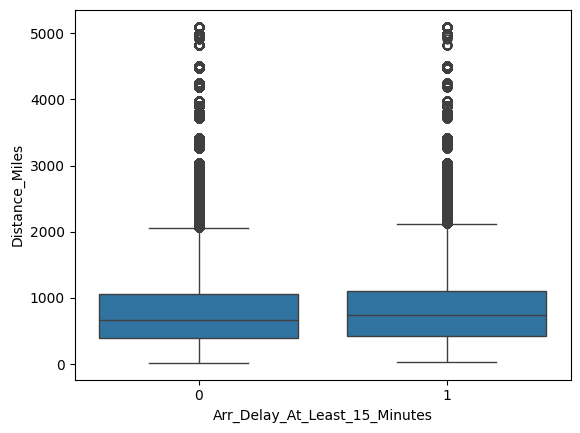

In [ ]:
sns.boxplot(x="Arr_Delay_At_Least_15_Minutes", y="Distance_Miles", data=df)

In [ ]:
df4

""
Carrier_Name
Year
Quarter
Month
Month_Day
Week_Day
Flight_Date
Airline_DOT_ID
Tail_Number
Flight_Number


In [ ]:
df_num = df[df.columns[df.dtypes != 'object']]

In [ ]:
# prompt: Rearrange columns in df_num that Arr_Delay_At_Least_15_Minutes is the 1st column

# Get a list of all column names
cols = df_num.columns.tolist()

# Move 'Arr_Delay_At_Least_15_Minutes' to the first position
cols.insert(0, cols.pop(cols.index('Arr_Delay_At_Least_15_Minutes')))

# Reorder the DataFrame columns
df_num = df_num[cols]


In [ ]:
df_num.head()

,Arr_Delay_At_Least_15_Minutes,Year,Quarter,Month_Day,Airline_DOT_ID,Flight_Number,Origin_Airport_ID,Origin_City_Market_ID,Destination_Airport_ID,Destination_City_Market_ID,Scheduled_Departure_Time,Actual_Dep_Time,Dep_Time_Offset,Dep_Delay_Minutes,Dep_Delay_At_Least_15_Minutes,Scheduled_Arrival_Time,Actual_Arr_Time,Arr_Time_Offset,Arr_Delay_Minutes,Flight_Cancelled,Flight_Diverted,Scheduled_Gate_to_Gate_Time,Actual_Gate_to_Gate_Time,Time_Airborne,Number_of_Flights,Distance_Miles,Distance_Group,Carrier_Delay,Weather_Delay,National_Aviation_System_Delay,Security_Delay,Late_Aircraft_Delay
0,0,2023,2,26,19977,1788,11298,30194,11618,31703,1926,1933,7,7,0,2359,12,13,13,0,0,213,219,162,1,1372,6,0.0,0.0,0.0,0.0,0.0
1,1,2023,2,26,19977,1787,11292,30325,13871,33316,2051,2130,39,39,1,2316,3,47,47,0,0,85,93,65,1,472,2,39.0,0.0,8.0,0.0,0.0
2,0,2023,2,26,19977,1786,12892,32575,11042,30647,2328,2319,-9,0,0,701,650,-11,0,0,0,273,271,249,1,2052,9,0.0,0.0,0.0,0.0,0.0
3,0,2023,2,26,19977,1785,10721,30721,12264,30852,600,557,-3,0,0,735,724,-11,0,0,0,95,87,69,1,413,2,0.0,0.0,0.0,0.0,0.0
4,0,2023,2,26,19977,1784,14747,30559,11292,30325,1116,1113,-3,0,0,1459,1453,-6,0,0,0,163,160,129,1,1024,5,0.0,0.0,0.0,0.0,0.0


<Axes: >

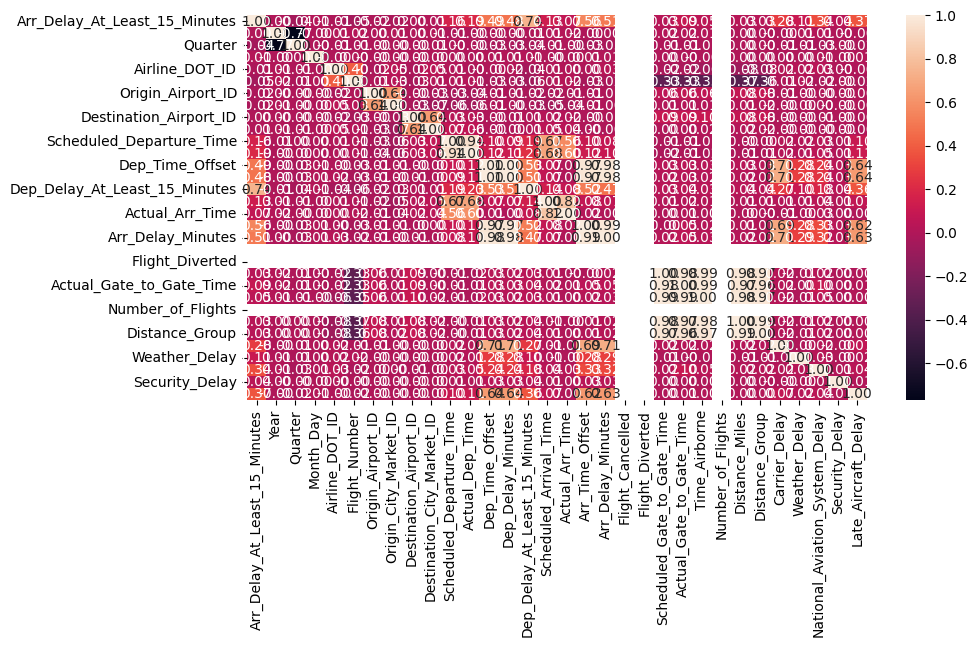

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_num.corr(), annot=True, fmt=".2f")

After we took a closer look at the variables, it's time to chose the variables with the best predictive power.
I suspect that the best categorical variqables will be:

*   Carrier_Name
*   Month
*   Week_Day
*  Dep_Time_Block_Group

Numerical variables with best predictive power:


*   Scheduled_Departure_Time
*   Distnce_Group
*   Month_Day  (?)
*   Dep_Time_Offset




Now I am going to remove columns that "leak the data" or that I won't know ahead of time.

*  Actuall_Dep_Time
*  Dep_Time_Offset                 
*  Dep_Delay_Minutes
*  Arr_Time_Offset                 
*  Arr_Delay_Minutes
*  Actual_Gate_to_Gate_Time
*  Carrier_Delay                   
*  Weather_Delay                   
*  National_Aviation_System_Delay  
*  Security_Delay     
*  Late_Aircraft_Delay      

In [ ]:
drop_col = ['Scheduled_Departure_Time',
'Actual_Dep_Time',
'Dep_Time_Offset',
'Dep_Delay_Minutes',
'Arr_Time_Offset',
'Arr_Delay_Minutes',
'Actual_Gate_to_Gate_Time',
'Carrier_Delay',
'Weather_Delay',
'National_Aviation_System_Delay',
'Security_Delay',
'Late_Aircraft_Delay']

In [ ]:
df_num = df_num.drop(drop_col, axis=1)

<Axes: >

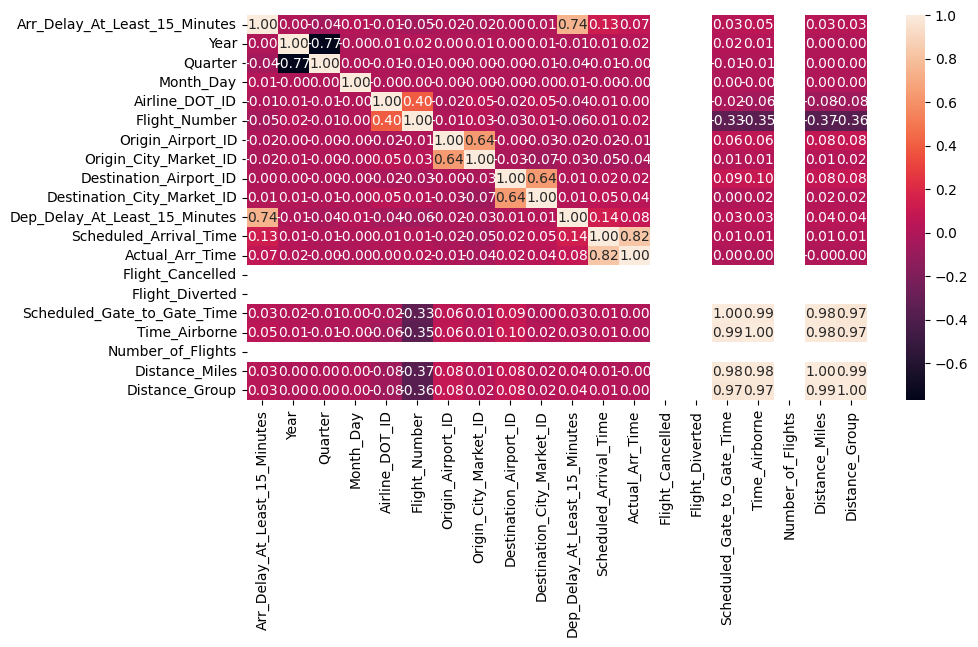

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_num.corr(), annot=True, fmt=".2f")

In [ ]:
0   Carrier_Name                    object
 1   Year                            int64
 2   Quarter                         int64
 3   Month                           object
 4   Month_Day                       int64
 5   Week_Day                        object
 6   Flight_Date                     object
 7   Airline_DOT_ID                  int64
 8   Tail_Number                     object
 9   Flight_Number                   int64
 10  Origin_Airport_ID               int64
 11  Origin_City_Market_ID           int64
 12  Origin_IATA_Code                object
 13  Origin_City_State               object
 14  Destination_Airport_ID          int64
 15  Destination_City_Market_ID      int64
 16  Destination_IATA_Code           object
 17  Destination_City_State          object
 18  Dep_Time_Block_Group            object
 19  Scheduled_Departure_Time        int64
 20  Actual_Dep_Time                 int64
 21  Dep_Time_Offset                 int64
 22  Dep_Delay_Minutes               int64
 23  Dep_Delay_At_Least_15_Minutes   int64
 24  Scheduled_Arrival_Time          int64
 25  Arr_Time_Block_Group            object
 26  Actual_Arr_Time                 int64
 27  Arr_Time_Offset                 int64
 28  Arr_Delay_Minutes               int64
 29  Arr_Delay_At_Least_15_Minutes   int64
 30  Flight_Cancelled                int64
 31  Flight_Diverted                 int64
 32  Scheduled_Gate_to_Gate_Time     int64
 33  Actual_Gate_to_Gate_Time        int64
 34  Time_Airborne                   int64
 35  Number_of_Flights               int64
 36  Distance_Miles                  int64
 37  Distance_Group                  int64
 38  Carrier_Delay                   float64
 39  Weather_Delay                   float64
 40  National_Aviation_System_Delay  float64
 41  Security_Delay                  float64
 42  Late_Aircraft_Delay             float64

In [ ]:
ndf = df[['Arr_Delay_At_Least_15_Minutes','Carrier_Name', 'Quarter', 'Month', 'Week_Day','Dep_Time_Block_Group',
'Scheduled_Departure_Time','Distance_Group' ]]

In [ ]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777978 entries, 0 to 6777977
Data columns (total 8 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   Arr_Delay_At_Least_15_Minutes  int64 
 1   Carrier_Name                   object
 2   Quarter                        int64 
 3   Month                          object
 4   Week_Day                       object
 5   Dep_Time_Block_Group           object
 6   Scheduled_Departure_Time       int64 
 7   Distance_Group                 int64 
dtypes: int64(4), object(4)
memory usage: 413.7+ MB


In [ ]:
#import pandas as pd

# Multiple categorical columns
#categorical_cols = ['a', 'b', 'c', 'd']

#pd.get_dummies(data, columns=categorical_cols)

In [ ]:
ndf_cat = ['Carrier_Name','Month','Week_Day','Dep_Time_Block_Group']

In [ ]:
ndf = pd.get_dummies(ndf, columns=ndf_cat)
ndf.head()

In [ ]:
ndf.columns

In [ ]:
# those will be our features for the model
xcols = ['Quarter', 'Scheduled_Departure_Time',
       'Distance_Group', 'Carrier_Name_Alaska Airlines Inc.',
       'Carrier_Name_Allegiant Air', 'Carrier_Name_American Airlines Inc.',
       'Carrier_Name_Delta Air Lines Inc.', 'Carrier_Name_Endeavor Air Inc.',
       'Carrier_Name_Envoy Air', 'Carrier_Name_Frontier Airlines Inc.',
       'Carrier_Name_Hawaiian Airlines Inc.', 'Carrier_Name_JetBlue Airways',
       'Carrier_Name_PSA Airlines Inc.', 'Carrier_Name_Republic Airline',
       'Carrier_Name_SkyWest Airlines Inc.',
       'Carrier_Name_Southwest Airlines Co.', 'Carrier_Name_Spirit Air Lines',
       'Carrier_Name_United Air Lines Inc.', 'Month_Apr', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'Week_Day_Friday', 'Week_Day_Monday', 'Week_Day_Saturday',
       'Week_Day_Sunday', 'Week_Day_Thursday', 'Week_Day_Tuesday',
       'Week_Day_Wednesday', 'Dep_Time_Block_Group_Afternoon',
       'Dep_Time_Block_Group_Early Afternoon',
       'Dep_Time_Block_Group_Early Morning', 'Dep_Time_Block_Group_Evening',
       'Dep_Time_Block_Group_Morning', 'Dep_Time_Block_Group_Night']